In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YY4yOxwBNoDMFzDj0Gi3")
project = rf.workspace("usfx-xqsnn").project("peach-diseasesusfx-cy77o")
dataset = project.version(5).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.223, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to peach-diseasesUSFX--5 in yolov8:: 100%|██████████| 21836/21836 [00:07<00:00, 2829.39it/s]


In [ ]:
import cv2
import albumentations as A
import os
import shutil

In [ ]:
import os
image_root = '/content/peach-diseasesUSFX--5/train/images'
labels_root = '/content/peach-diseasesUSFX--5/train/labels'
a_images = '/content/peach-diseasesUSFX--5/train/images'
a_labels = '/content/peach-diseasesUSFX--5/train/labels'

In [ ]:
image_files[:10] ,len(image_files)

In [ ]:
import os
# reemplaza 'ruta_de_tu_carpeta' con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/peach-diseasesUSFX--5/train/images'))
print('Número de archivos en la carpeta:', num_archivos)

Número de archivos en la carpeta: 5478


In [ ]:
# Loop over each file in the image directory
for i, file in enumerate(image_files):
    # Read the original image
    image = cv2.imread(f"{image_root}/{file}")

    # Define the transformation for both image and labels
    transform = A.Compose([
        A.RandomBrightnessContrast(p=1),
        A.RandomGamma(p=1),
        A.CLAHE(p=1),
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-shaper.jpg', t_image)

    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-shaper.txt')

    # Define the transformation for both image and labels
    transform = A.Compose([
        A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.2,p=0.5),
        A.MotionBlur(blur_limit=33, p=0.1),
        A.GaussNoise(var_limit=(0, 255), p=0.1)
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-Channel.jpg', t_image)
    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-Channel.txt')

        # Define the transformation for both image and labels
    transform = A.Compose([
        A.CLAHE(p=1),
        A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
    ])


In [ ]:
import os

# reemplaza 'ruta_de_tu_carpeta' con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/peach-diseasesUSFX--5/train/images'))

print('Número de Imagenes en la carpeta:', num_archivos)

Número de Imagenes en la carpeta: 10359


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

NameError: ignored

In [ ]:
modelL = YOLO(f'/content/peach-diseasesUSFX--5/yolov8n-seg.pt')
#modelL = YOLO(f'/content/enfermedades-durazno-16/yolov8l-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 283MB/s]


In [ ]:
%cd /content/peach-diseasesUSFX--5
%ls

/content/peach-diseasesUSFX--5
data.yaml  README.dataset.txt  README.roboflow.txt  test/  train/  valid/  yolov8n-seg.pt


In [ ]:
test: /content/peach-diseasesUSFX--5/train/images
train: /content/peach-diseasesUSFX--5/train/images
val: /content/peach-diseasesUSFX--5/valid/images

[Errno 2] No such file or directory: '/content/enfermedades-durazno-4'
/content


In [ ]:
!yolo task=detect mode=train model=/content/peach-diseasesUSFX--5/yolov8n-seg.pt data=data.yaml epochs=50 imgsz=640 flipud=0.3 degrees=0.6

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/peach-diseasesUSFX--5/yolov8n-seg.pt, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, sh

In [ ]:
!ls /content/peach-diseasesUSFX--5/runs/segment/train/

args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1700831801.cc692bf160cf.2069.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


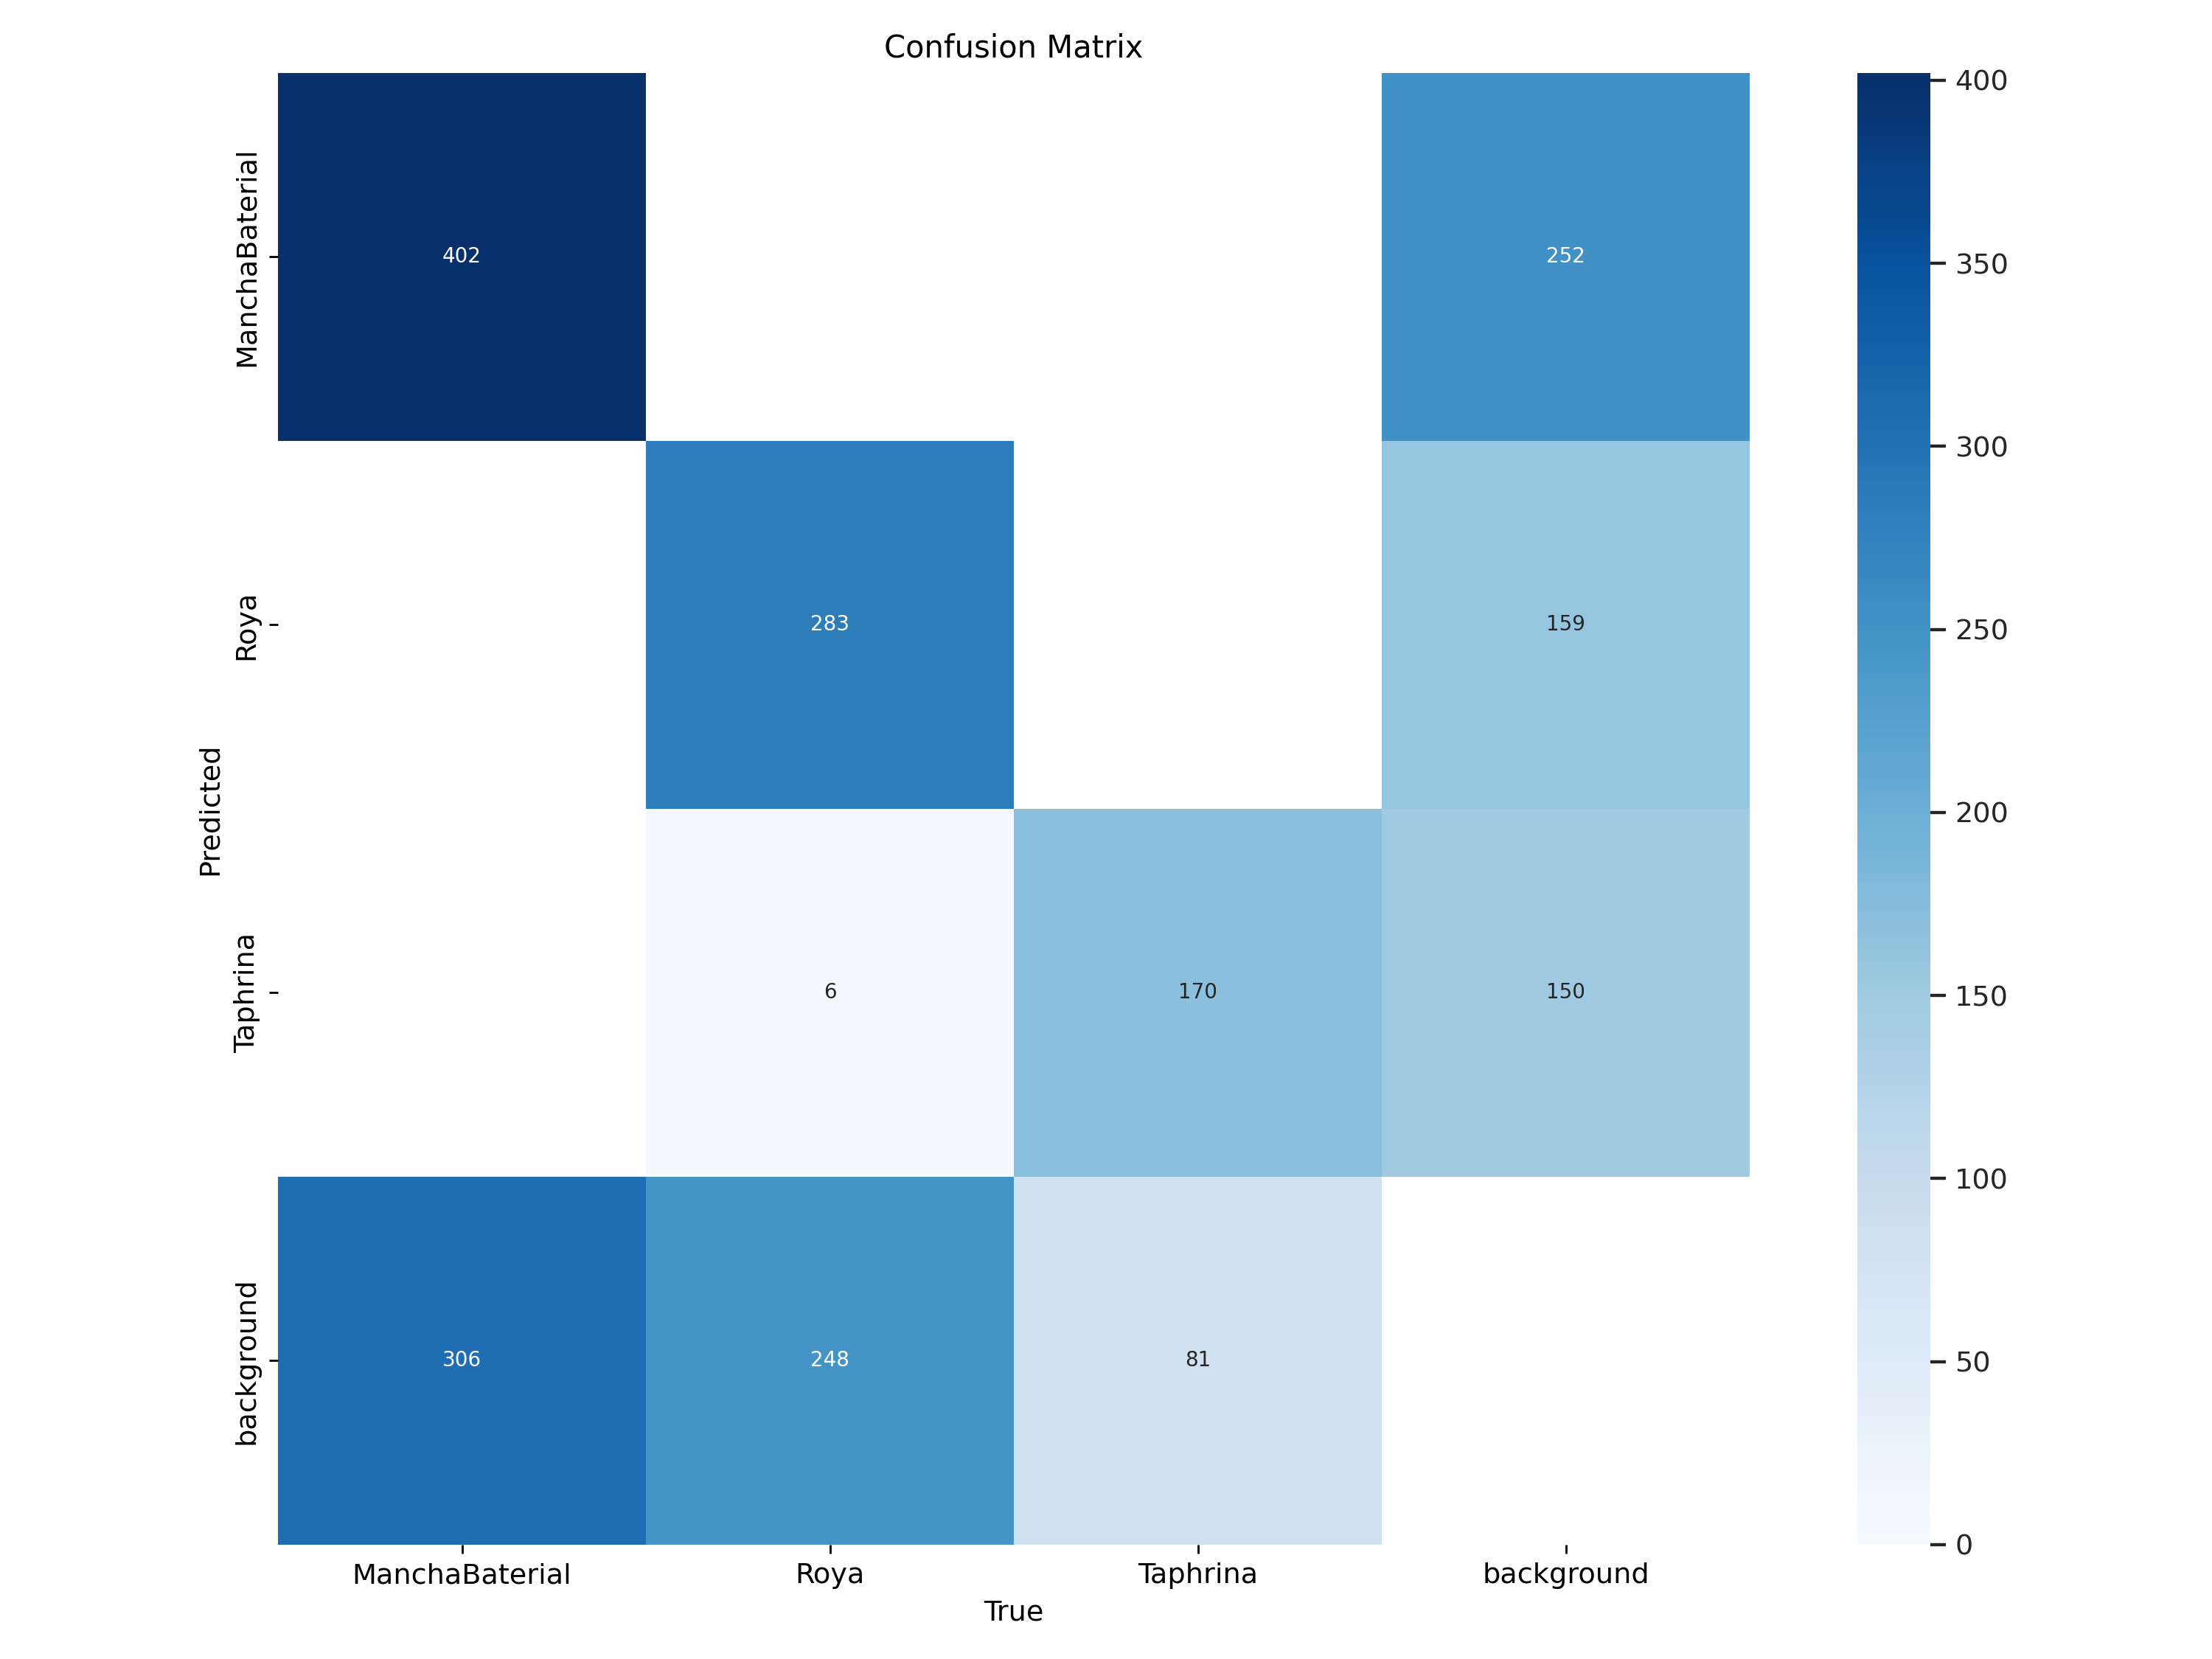

In [ ]:
Image(filename='/content/peach-diseasesUSFX--5/runs/segment/train2/confusion_matrix.png', width=600)

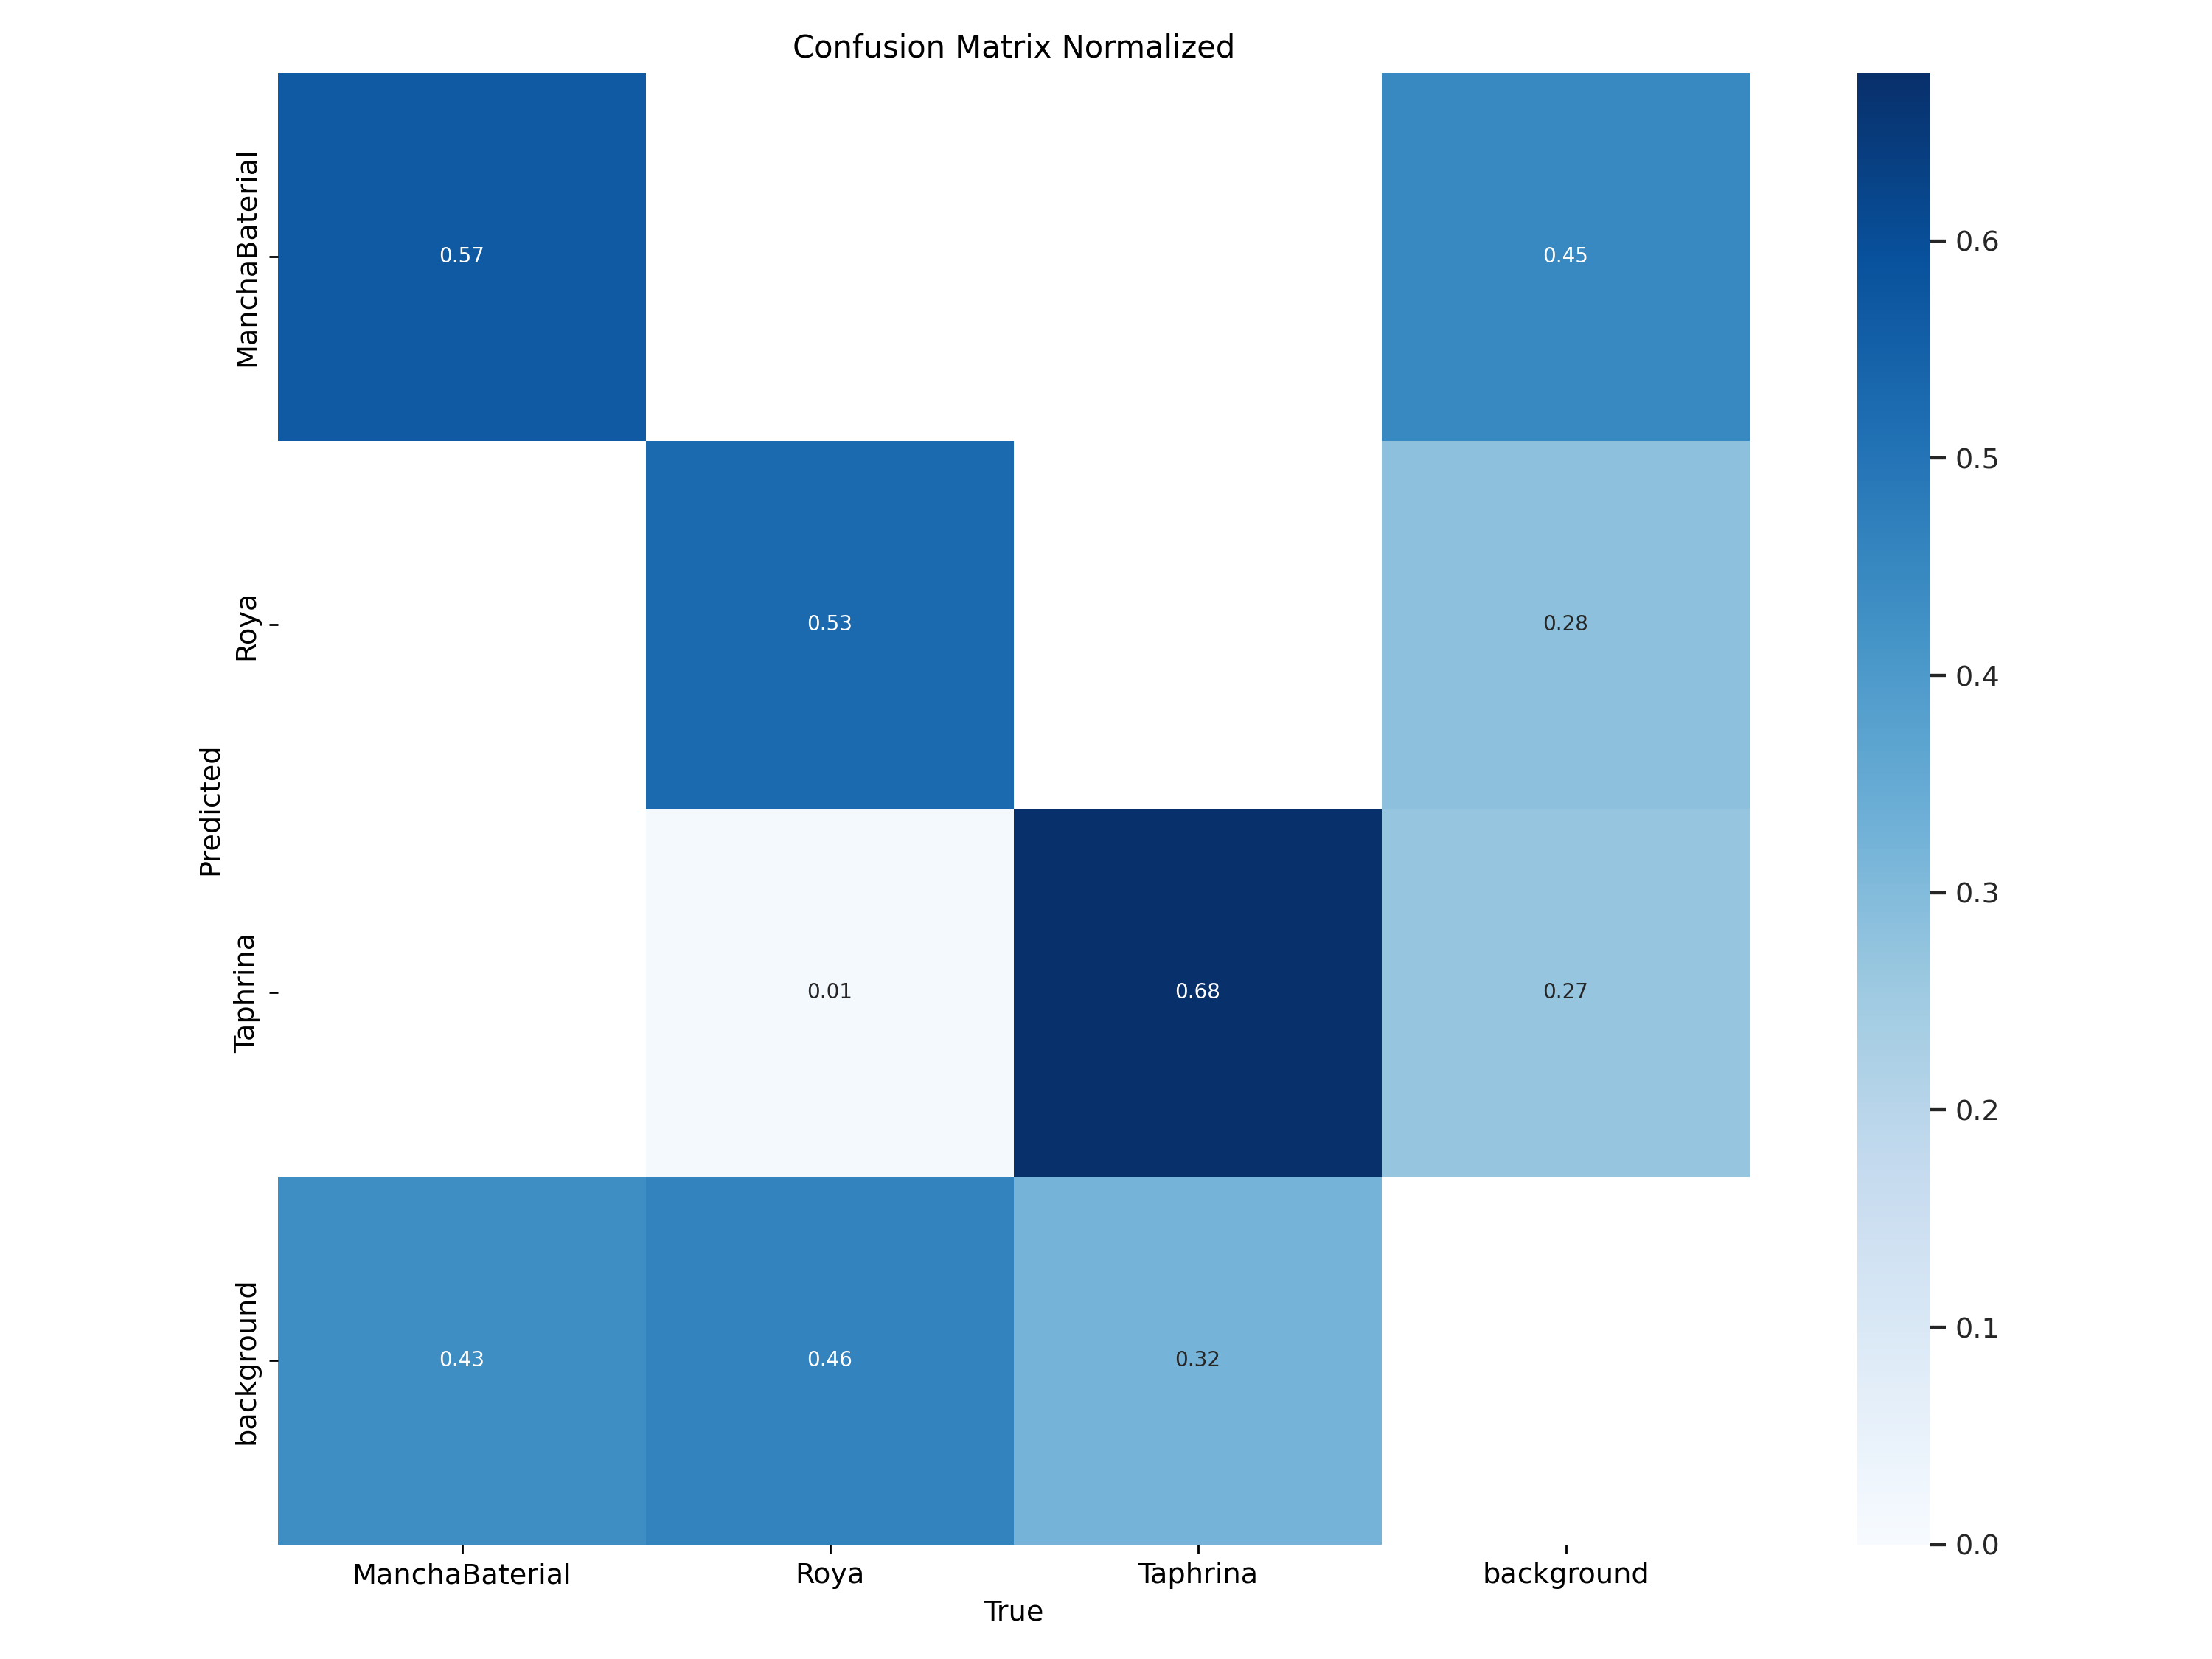

In [ ]:
Image(filename='/content/peach-diseasesUSFX--5/runs/segment/train2/confusion_matrix_normalized.png', width=600)

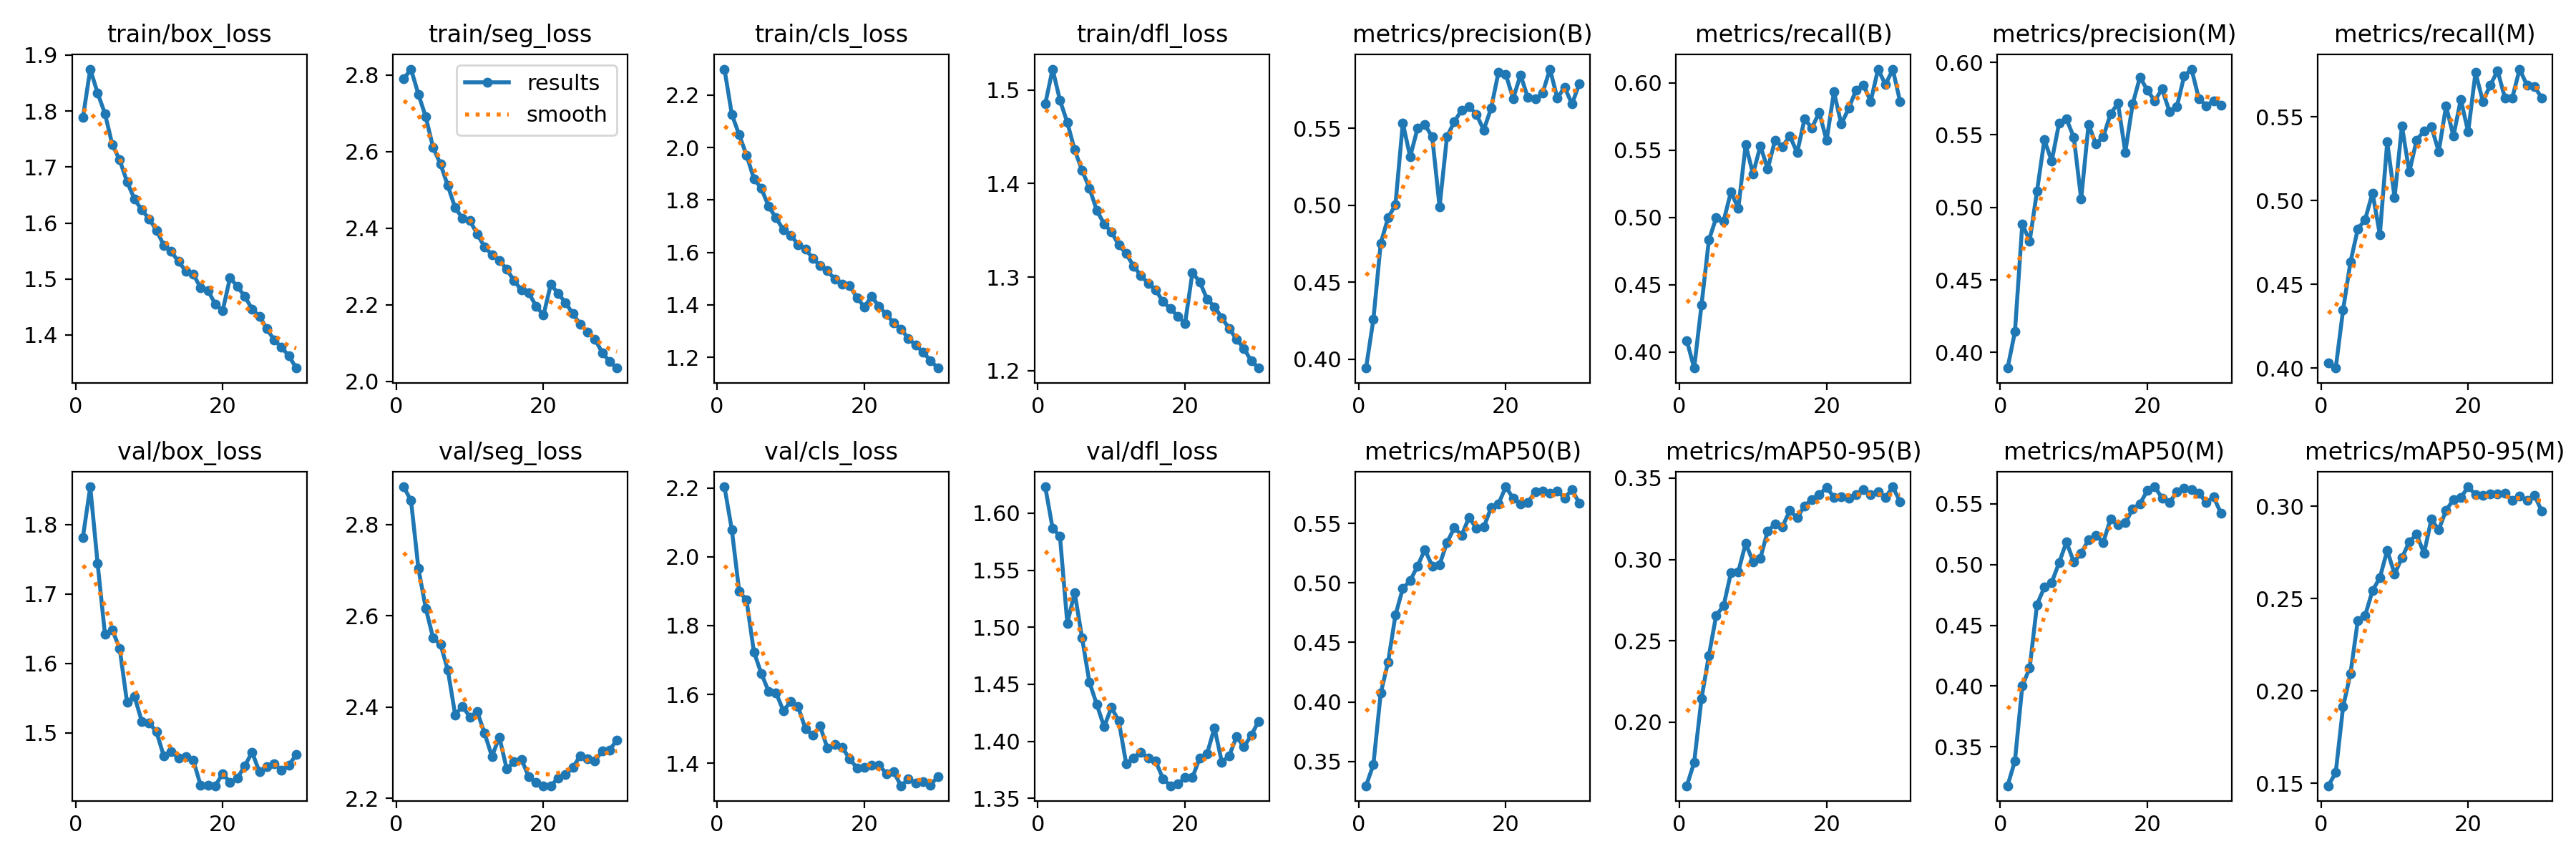

In [ ]:
Image(filename='/content/peach-diseasesUSFX--5/runs/segment/train2/results.png', width=600)

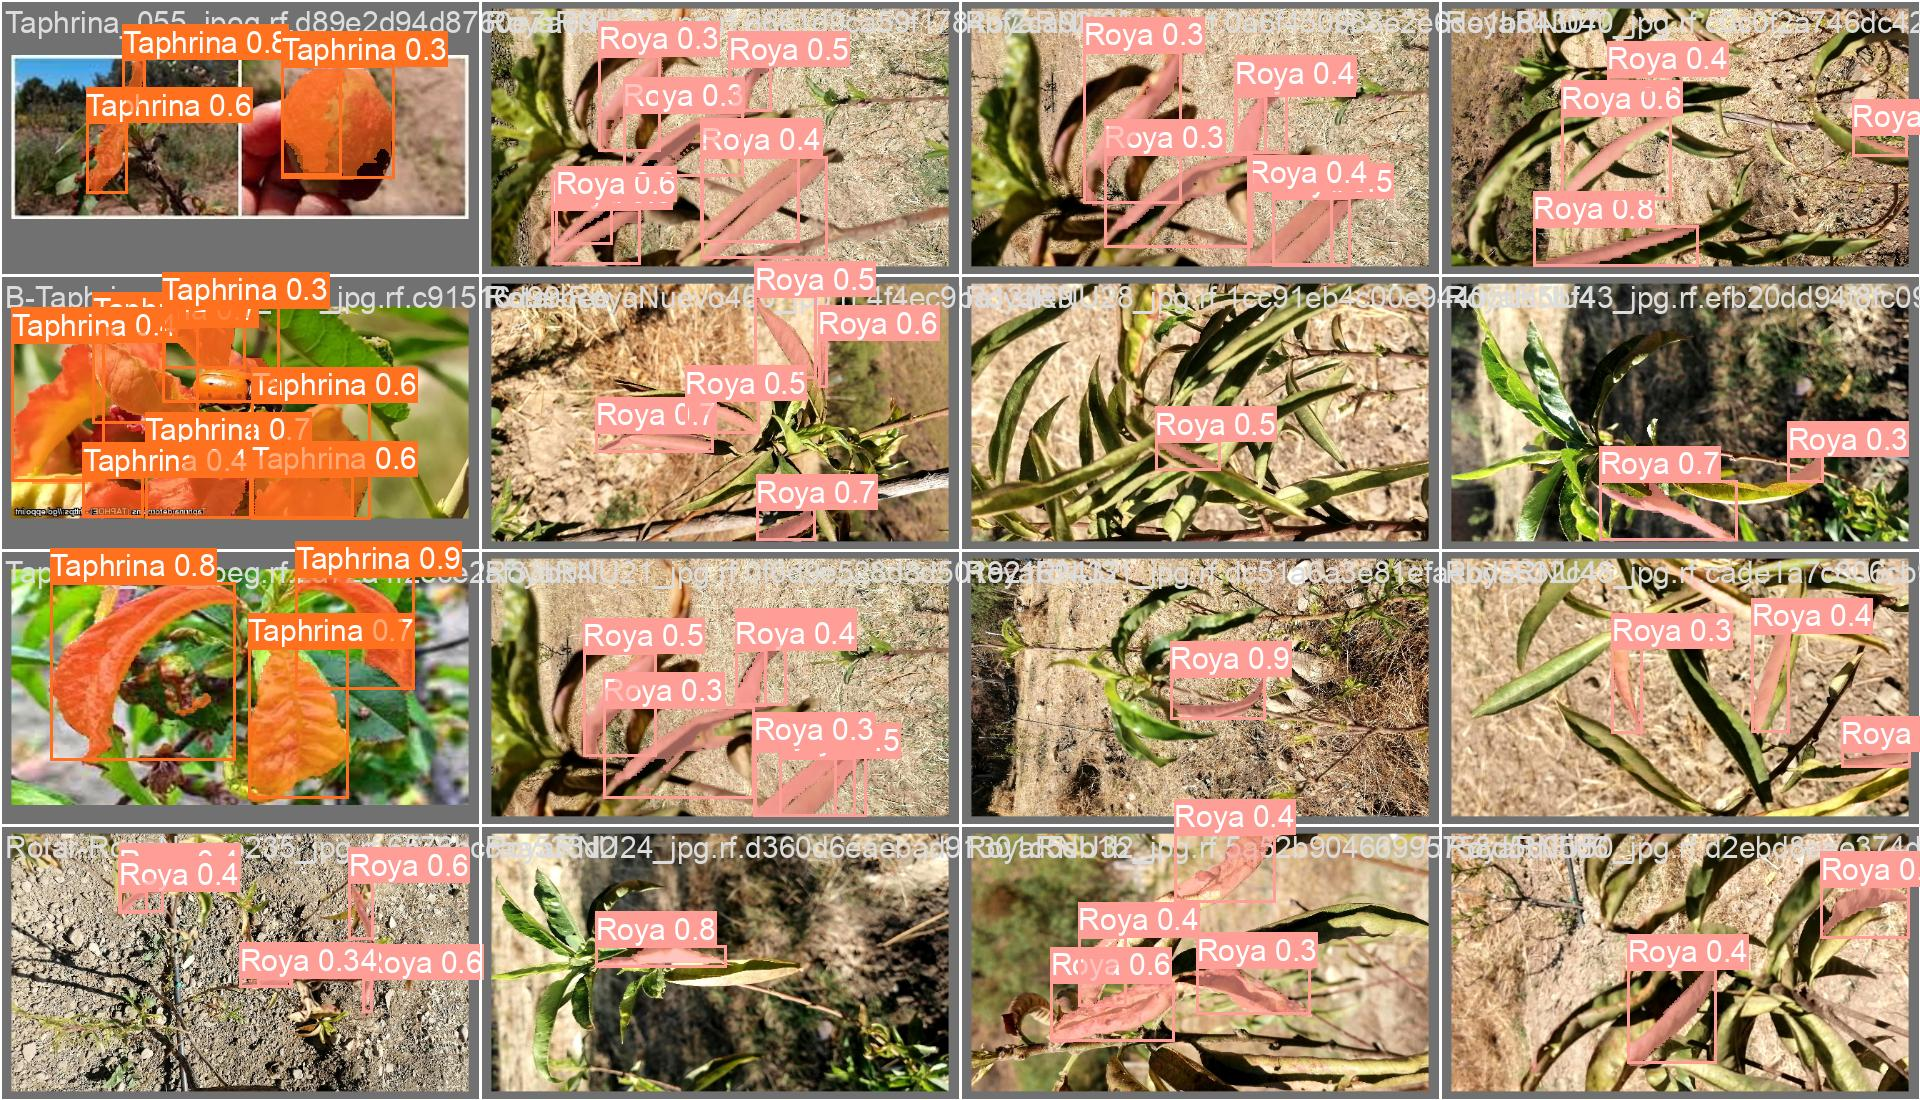

In [ ]:
Image(filename='/content/peach-diseasesUSFX--5/runs/segment/train2/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/peach-diseasesUSFX--5/runs/segment/train2/weights/best.pt data=data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/peach-diseasesUSFX--5/valid/labels.cache... 309 images, 0 backgrounds, 0 corrupt: 100% 309/309 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 20/20 [00:15<00:00,  1.29it/s]
                   all        309       1496      0.585      0.557       0.58      0.344      0.579      0.539      0.556      0.307
        ManchaBaterial        309        708      0.634      0.525      0.561      0.283      0.601       0.48      0.494      0.186
                  Roya        309        537      0.607      0.492      0.527      0.282      0.624      0.493  

In [ ]:
import shutil
# Ruta de la carpeta en Colab
carpeta_en_colab = '/content/peach-diseasesUSFX--5/runs'
# Ruta de destino en Google Drive
ruta_en_drive = '/content/drive/MyDrive/universidad/ProyectoIa/NuevoIntento_30_'
# Copiar la carpeta y su contenido a Google Drive
shutil.copytree(carpeta_en_colab, ruta_en_drive + 'Imagenes')

'/content/drive/MyDrive/universidad/ProyectoIa/NuevoIntento_30_Imagenes'

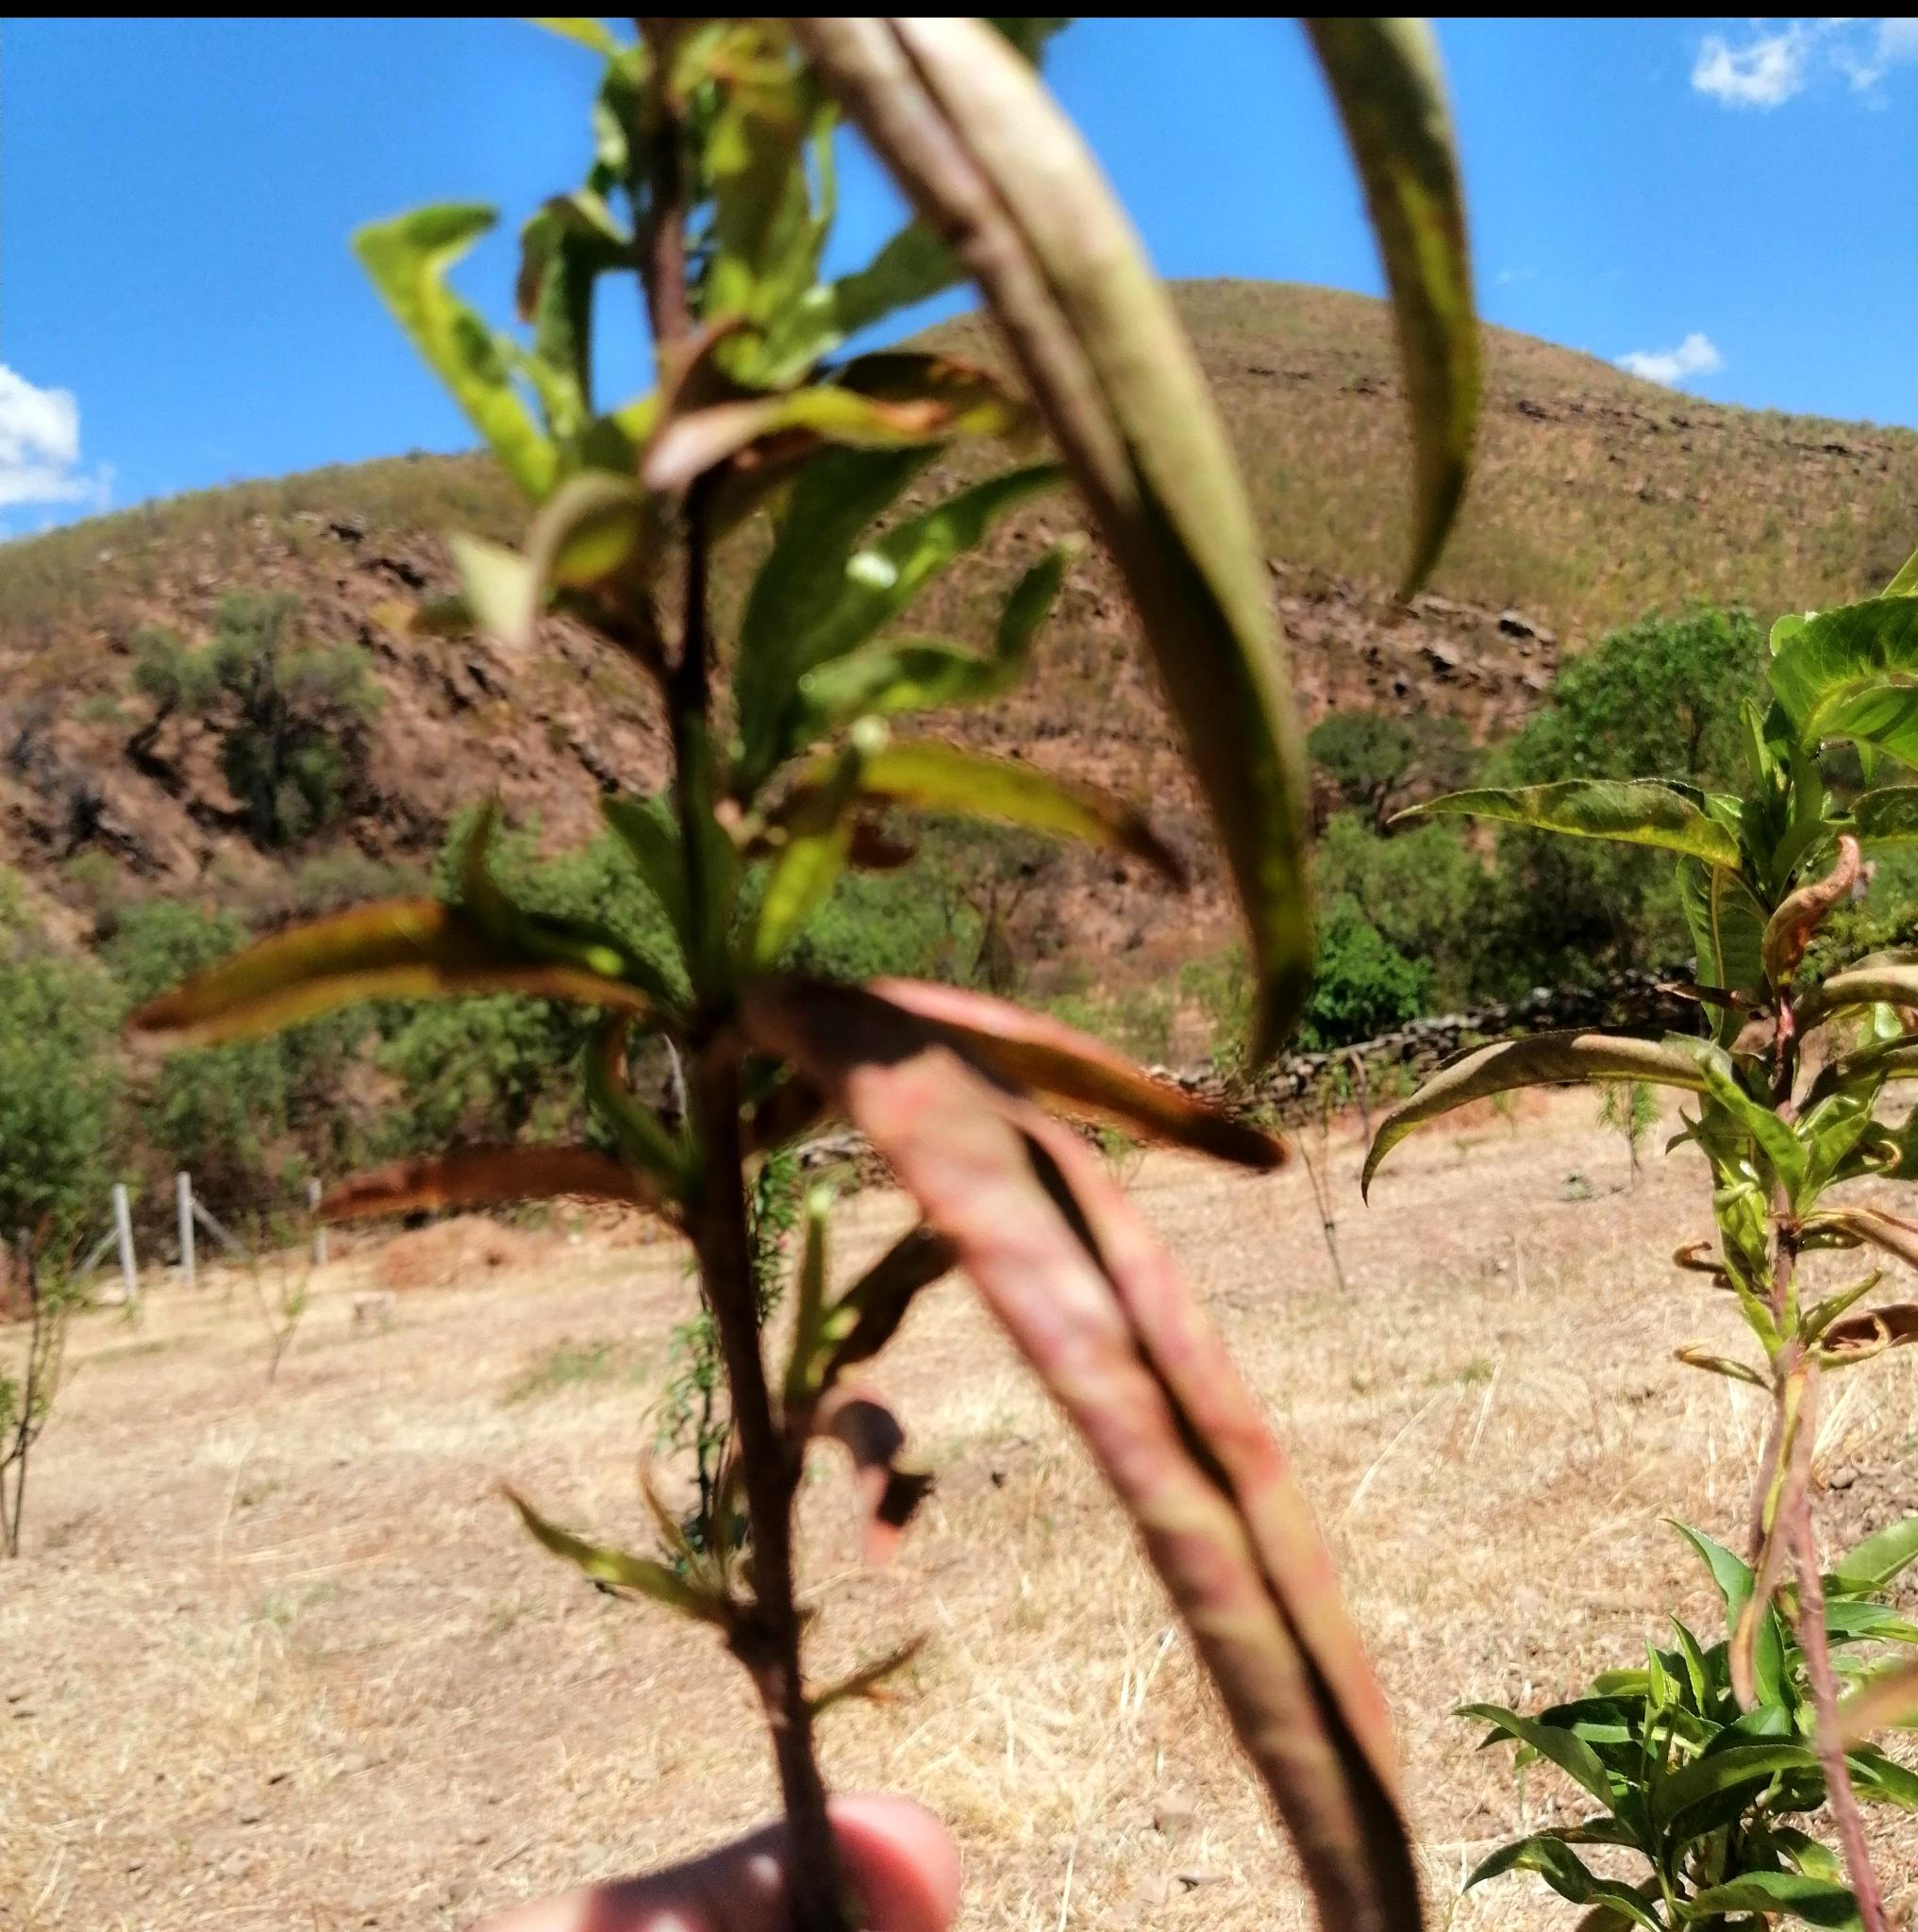

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='RoyaR_01344_jpg.rf.0e5696abec77dcb5d50a8967c2e9b9ed'
img =cv2.imread(f"/content/enfermedades-durazno-15/valid/images/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/enfermedades-durazno-15/valid/images/{img_name}.jpg", width=600)

In [ ]:
model= YOLO("/content/enfermedades-durazno-15/runs/segment/train2/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)


0: 640x640 4 Royas, 10.3ms
Speed: 3.2ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


True

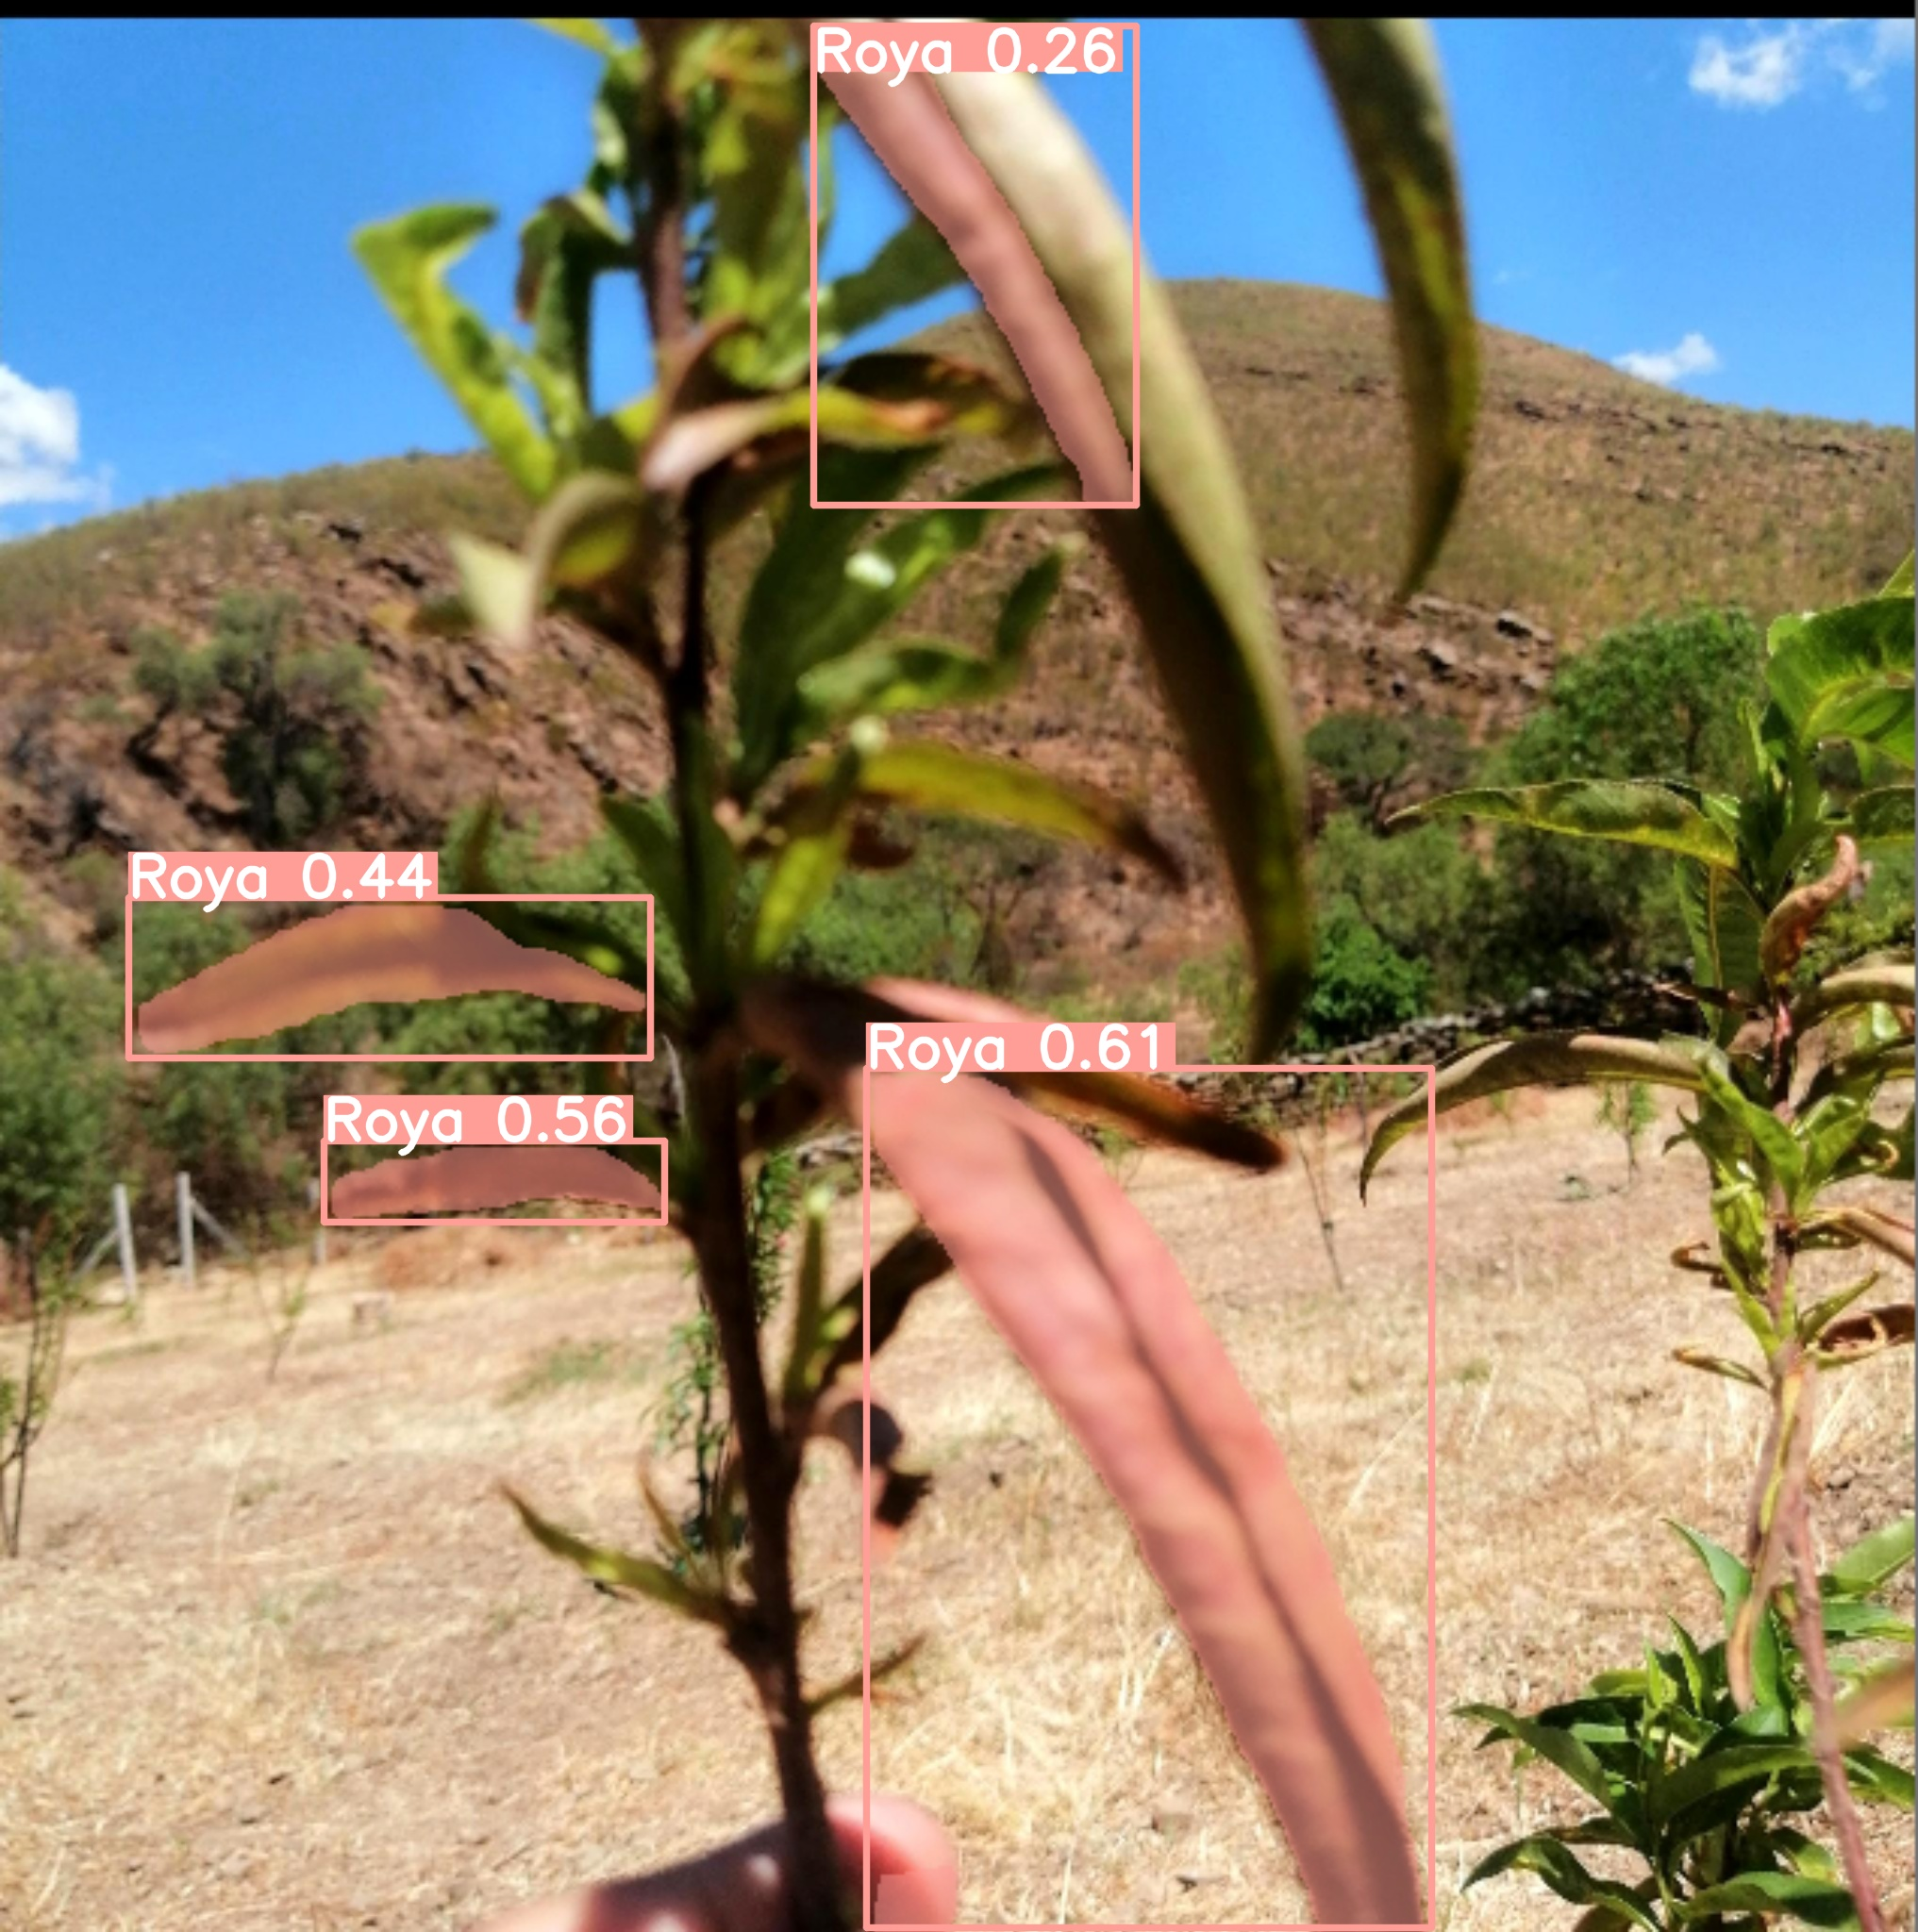

In [ ]:
Image(filename=f"/content/enfermedades-durazno-15/{img_name}.jpg", width=600)

In [ ]:
import cv2
import albumentations as A
import random as r
import os

In [ ]:
import os
image_root = '/content/peach-diseasesUSFX--5/valid/images'
labels_root = '/content/peach-diseasesUSFX--5/valid/labels'

In [ ]:
# Ruta del modelo entrenado
model_path = '/content/peach-diseasesUSFX--5/runs/segment/train2/weights/best.pt'
model = YOLO(model_path)

In [ ]:
# Obtener la lista de nombres de archivos en la carpeta de imágenes
image_files = os.listdir(image_root)
# Filtrar solo los archivos de imágenes
image_files = [file for file in image_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

In [ ]:
image_files[:3]

['RoyaRNU84_jpg.rf.e1d851a782e0defd16823fb2e31320ba.jpg',
 'RoyaRNU210_jpg.rf.aa50c03888415584829259f946fed0db.jpg',
 'Roya1Nu__1300_jpg.rf.6d21969fbea546f5fa36f6f41603b8b4.jpg']


0: 384x640 (no detections), 128.4ms
Speed: 21.1ms preprocess, 128.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


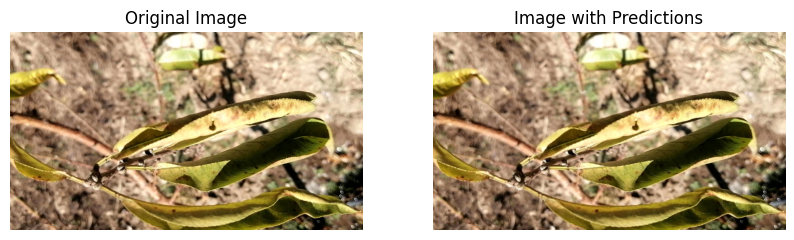


0: 640x640 6 Royas, 46.7ms
Speed: 4.8ms preprocess, 46.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


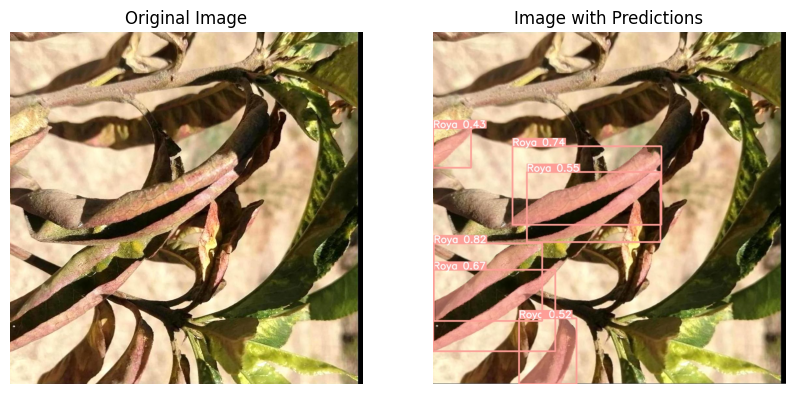


0: 640x640 4 Royas, 45.8ms
Speed: 4.2ms preprocess, 45.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


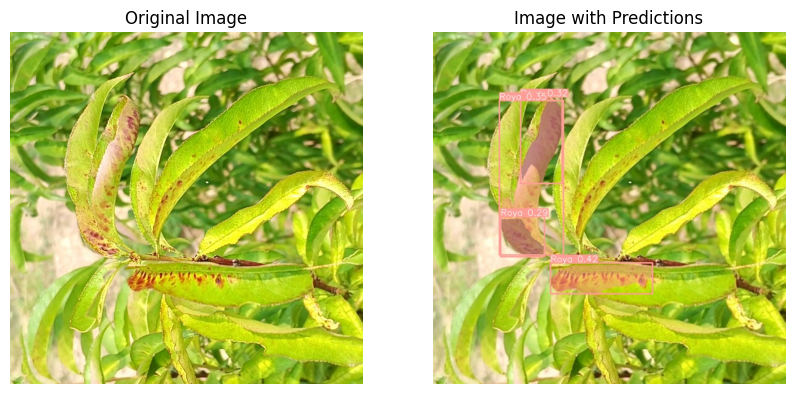

In [ ]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Loop sobre cada archivo en el directorio de imágenes
for i, file in enumerate(image_files[:3]):
    # Leer la imagen original
    img_path = os.path.join(image_root, file)
    img = cv2.imread(img_path)

    # Realizar predicciones
    predictions = model.predict(img)[0]
    # Mostrar las predicciones en la imagen
    pred_image = predictions.plot()

    # Guardar la imagen con predicciones
    output_path = f"{file[:-4]}_predictions.jpg"
    cv2.imwrite(output_path, pred_image)

    # Crear una figura de matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Mostrar la imagen original en el primer eje
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].axis('off')
    axs[0].set_title('Original Image')

    # Mostrar la imagen con predicciones en el segundo eje
    pred_img = cv2.imread(output_path)
    axs[1].imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
    axs[1].axis('off')
    axs[1].set_title('Image with Predictions')

    # Mostrar la figura
    plt.show()

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/universidad/ProyectoIa/Prueba50%01/segment/train/weights/best.pt')  # load an official model

# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/universidad/ProyectoIa/Prueba50%01/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (52.3 MB)
requirements: Ultralytics requirements ['onnx', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 224.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 150.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 8.8 MB/s eta 0:0

ImportError: ignored